**Supervised - Salary Prediction - Regression**

In [1]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import dataset

In [2]:
# read the dataset using pandas
data = pd.read_csv('Salary_Data.xls')

In [3]:
# This displays the top 7 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Exploratory Data Analysis

In [4]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
# this describes the basic stat behind the dataset used
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

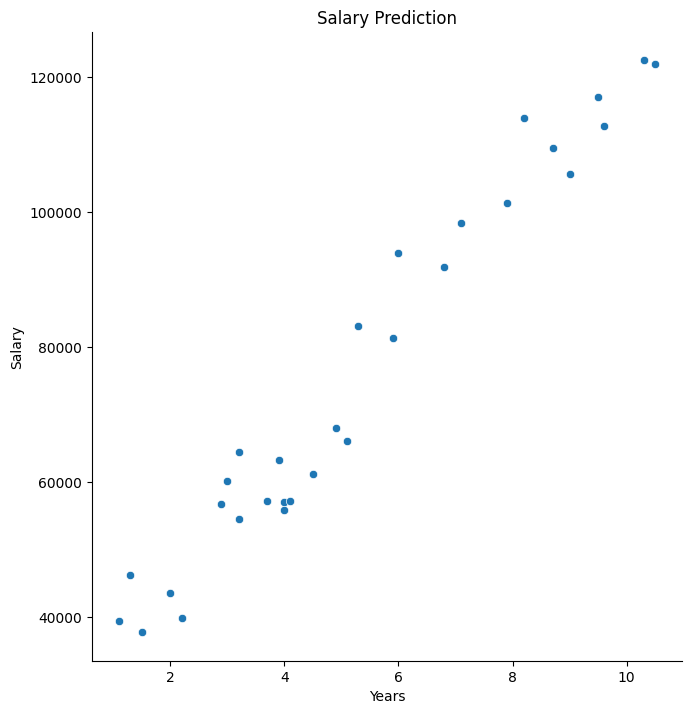

In [6]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

### Investigate of Feature Engineering

In [7]:
df = data.copy()

In [8]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(30, 2)


In [9]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,YearsExperience,Salary


In [10]:
df = df.drop_duplicates()

In [11]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(30, 2)


In [12]:
#Check missing value
df.isna().sum()

,0
YearsExperience,0
Salary,0


### There is no missing value

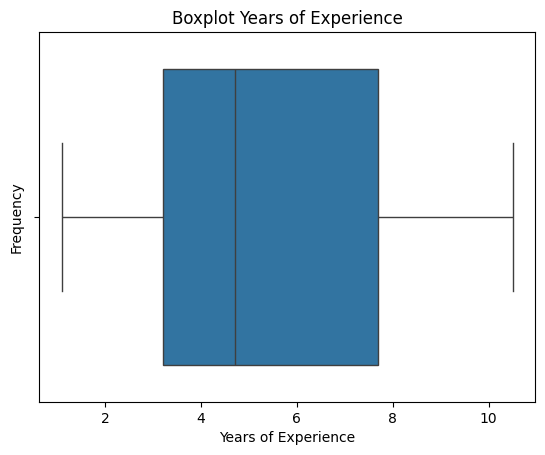

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="YearsExperience", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Years of Experience" atau "Tahun Pengalaman"
plt.title("Boxplot Years of Experience")

# Menampilkan plot
plt.show()

### There's no outlier value
### There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

### Splitting the data

In [16]:
# Experience of Years data
X = df['YearsExperience']
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [17]:
# Salary data
y = df['Salary']
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [18]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [21]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)
# X_train dan y_train -> knowledge dari dosen ke mahasiswa (X_train contoh soal), y_train (kunci jawaban dari contoh soal)
# X_test dan y_test -> soal2 ujian (UTS maupun UAS) (X_test), y_test (kunci jawaban dosennya / data aktual)

In [22]:
X_train

,YearsExperience
12,4.0
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9
1,1.3
2,1.5


In [23]:
X_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7
28,10.3
24,8.7


**Linear Regression**

In [24]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [27]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy() # Kolom x nya ada 1 saja, jika lebih dari 1 untuk x nya maka tidak code to_numpy() dibiarkan dalam bentuk dataframe
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [28]:
#array
X_train

array([[ 4. ],
       [ 1.1],
       [ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [ ]:
#array
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

In [ ]:
y_train

,Salary
12,56957.0
0,39343.0
4,39891.0
16,66029.0
5,56642.0
13,57081.0
11,55794.0
22,101302.0
1,46205.0
2,37731.0


In [ ]:
y_test

,Salary
27,112635.0
15,67938.0
23,113812.0
17,83088.0
8,64445.0
9,57189.0
28,122391.0
24,109431.0


In [29]:
# Fitting the model using Linear Regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(X_train,y_train) # Belajar

LinearRegression()

In [30]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([ 62962.19175479,  35786.24512367,  46094.36281133,  73270.30944245,
        52654.07406712,  63899.29336276,  62962.19175479,  99509.1544656 ,
        37660.44833961,  39534.65155555, 109817.27215327,  44220.15959539,
        92012.34160185, 114502.78019312,  80767.12230621, 123873.79627281,
        89201.03677794,  55465.37889103,  62025.09014682,  67647.69979464,
        81704.22391418,  53591.17567509])

In [ ]:
y_train

,Salary
12,56957.0
0,39343.0
4,39891.0
16,66029.0
5,56642.0
13,57081.0
11,55794.0
22,101302.0
1,46205.0
2,37731.0


In [31]:
# Predicting the Salary for the Test values
y_pred = lr_model.predict(X_test) # UTS ataupun UAS
# y_pred -> jawaban mahasiswa linear regression

In [32]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

In [33]:
y_pred

array([115439.88180109,  71396.10622651, 102320.45928951,  75144.51265839,
        55465.37889103,  60150.88693088, 121999.59305688, 107005.96732936])

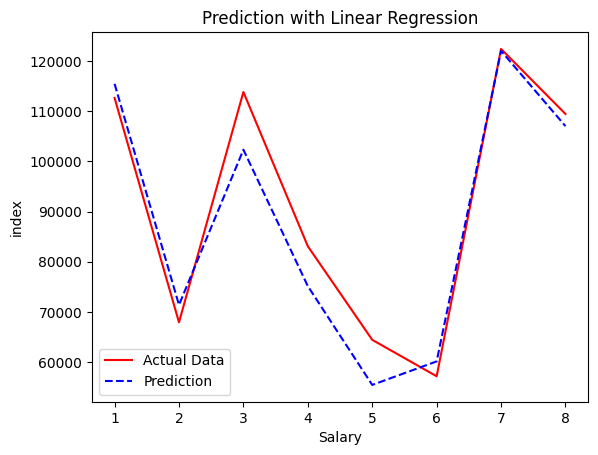

In [34]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [35]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [38]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9347210011126782


In [39]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 25478.12743600038
Coefficient of the line Linear Regression: [9371.0160797]


![](http://)Then it is said to form a line with result in Linear Regression
# y = 25478.12 + 9731.016 x
with x is the value of year experience work

In [ ]:
# y_test = 112635.0
# x_test = 9.6
# y = 25478.12 + 9731.016 * 9.6

nilai_y = 25478.12 + 9731.016 * 9.6
print('nilai y : ', nilai_y )

nilai y :  118895.87359999999


**Decision Tree Regressor**
Using another Machine Learning Model :
1. Decision Tree
2. Random Forest

In [25]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [40]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

In [ ]:
y_pred_dt

array([116969.,  66029., 101302.,  66029.,  54445.,  63218., 121872.,
       105582.])

In [ ]:
y_test

,Salary
27,112635.0
15,67938.0
23,113812.0
17,83088.0
8,64445.0
9,57189.0
28,122391.0
24,109431.0


In [ ]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

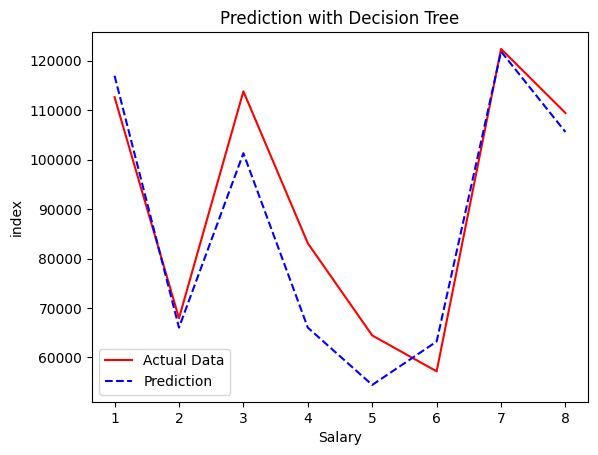

In [42]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [43]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [44]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8693307583517671


### Using Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

you can doing modelling using RandomForest Regressor with the same flow like Decision Tree or LinearRegression above :)